# Fashion MNIST Classifier

_Author: Kostas Batsis_ <br>
_Date: 29/10/2021_

This project concerns the construcion of a convolutional neural network (CNN) classifier for the Fashion MNIST dataset. The Fashion MNIST (copyright Zalando SE) consists of 28x28 greyscale images depicting fashion items. There are ten different classes of items which are integer coded. The training set includes 60000 images and the test set 10000 images. Figure 1 presents a visual sample of the images and table 1 the item classes along with their description.

The model was constructed with Python 3.8 and Tensorflow 2.3.0.

![title](fashion_mnist.png)
<center>Figure 1: Visual sample of the fashion MNIST dataset.</center>

![title](classes.jpg)
<center>Table 1: The Fashion MNIST integer coded classes along with their description.</center>

First I imported the necessary python modules as well as the dataset which is included in the tf.keras dataset collection.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Then I moved on with the preprocessing of the data. I checked the shape of the data to make sure it was in the correct form and I added one more dimension for the single channel of the greyscale images. I also horizontally flipped 15000 out the 60000 images of the training set in order to boost the generalizability of the CNN model. Since the labels are categorical without any ordinal relationship between them I converted their integer encoding to an One Hot one. Finally I scaled the values of the image arrays to a [0,1] range.

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.copy()
horizontalFlipIndex = np.random.randint(0,60000,15000)
horizontalFlipIndex = horizontalFlipIndex.tolist()
for i in horizontalFlipIndex:
    X_train[i] = cv2.flip(X_train[i],0)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

print("\n")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

oneHot = LabelBinarizer()
y_train = oneHot.fit_transform(y_train)
y_test = oneHot.transform(y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [4]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0    

To proceed I created a function to build the model architecture. The function takes two arguments, one for the number of fully connected layers and one for the (constant) number of neurons in each such layer. The model also includes a convolutional input layer with 32 filters and a 3x3 kernel size followed by 2x2 max pooling layer. Another convolutional layer follows, with 64 filters and a kernel size of 3x3 followed again by a 2x2 max pooling layer. Then the output of this last layer is flattened and fed into a single fully connected layer consisting of 64 neurons with a relu activation function (see next section). Then comes a drop-out regularization layer with a rate of 0.2 and finally a softmax output layer for the 10 classes. The whole architecture was decided by a combination of subjective judgement and manual experimentation with different models.

The chosen loss function is categorcal crossentropy which is suitable for the One Hot encoding of the classes, the chosen metric for the training evaluation is accuracy and the optimization algorithm is Adam with a learning rate of 0.003.

In [5]:
def createModel(totalFCLayers,totalFCLayerUnits):
  model = tf.keras.models.Sequential() 
  model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),data_format="channels_last",input_shape=(28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),data_format="channels_last"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Flatten())
  for i in range(totalFCLayers):
    model.add(tf.keras.layers.Dense(units=totalFCLayerUnits,activation="relu",))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10,activation="softmax"))  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),loss="categorical_crossentropy",
                metrics=["accuracy"])  
  return model 

For the training phase I fitted the model. As mentioned a single fully connected layer with 64 neurons was chosen along with 400 epochs and a batch size of 10000, note that the training data are shuffled before each epoch. Before training the model a summary of its architecture is printed and after training a plot of epochs vs accuracy is displayed to check for convergence of the model. Finally the test set is evaluated.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

6/6 [==============================] - 35s 6s/step - loss: 0.1252 - accuracy: 0.9534
Epoch 154/400
6/6 [==============================] - 36s 6s/step - loss: 0.1237 - accuracy: 0.9542
Epoch 155/400
6/6 [==============================] - 35s 6s/step - loss: 0.1256 - accuracy: 0.9530
Epoch 156/400
6/6 [==============================] - 35s 6s/step - loss: 0.1243 - accuracy: 0.9531
Epoch 157/400
6/6 [==============================] - 35s 6s/step - loss: 0.1229 - accuracy: 0.9545
Epoch 158/400
6/6 [==============================] - 34s 6s/step - loss: 0.1204 - accuracy: 0.9555
Epoch 159/400
6/6 [==============================] - 35s 6s/step - loss: 0.1174 - accuracy: 0.9559
Epoch 160/400
6/6 [==============================] - 35s 6s/step - loss: 0.1187 - accuracy: 0.9560
Epoch 161/400
6/6 [==============================] - 35s 6s/step - loss: 0.1177 - accuracy: 0.9563
Epoch 162/400
6/6 [==============================] - 34s 6s/step - loss: 0.1180 - accuracy: 0.9557
Epoch 163/400
6/6 [=====

6/6 [==============================] - 35s 6s/step - loss: 0.0472 - accuracy: 0.9826
Epoch 318/400
6/6 [==============================] - 35s 6s/step - loss: 0.0486 - accuracy: 0.9822
Epoch 319/400
6/6 [==============================] - 35s 6s/step - loss: 0.0473 - accuracy: 0.9824
Epoch 320/400
6/6 [==============================] - 35s 6s/step - loss: 0.0479 - accuracy: 0.9827
Epoch 321/400
6/6 [==============================] - 35s 6s/step - loss: 0.0475 - accuracy: 0.9824
Epoch 322/400
6/6 [==============================] - 34s 6s/step - loss: 0.0466 - accuracy: 0.9830
Epoch 323/400
6/6 [==============================] - 38s 6s/step - loss: 0.0466 - accuracy: 0.9832
Epoch 324/400
6/6 [==============================] - 39s 7s/step - loss: 0.0453 - accuracy: 0.9843
Epoch 325/400
6/6 [==============================] - 35s 6s/step - loss: 0.0449 - accuracy: 0.9834
Epoch 326/400
6/6 [==============================] - 36s 6s/step - loss: 0.0454 - accuracy: 0.9836
Epoch 327/400
6/6 [=====

[0.6261930465698242, 0.9017999768257141]

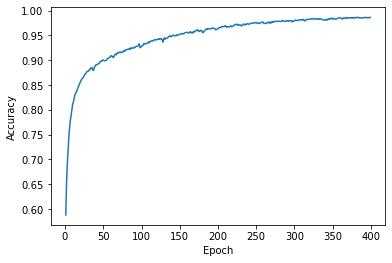

In [6]:
epochs = 400
batch = 10000

model = createModel(1,64)
print(model.summary())
trainRecord = model.fit(x=X_train_norm,y=y_train,batch_size=batch,epochs=epochs,shuffle=True)

epochRecord = trainRecord.epoch
history = pd.DataFrame(trainRecord.history)

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epochRecord[1:], history['accuracy'][1:])
    
model.evaluate(x=X_test_norm,y=y_test,batch_size=2000)

After the training we see in the graph that that the model has converged with a high training set accuracy of 0.9862 and an also high test set accuracy of 0.9018.

To further evaluate the perfomance of the model I saved the class probability predictions of the test set, I converted them into class predictions and then I converted the One Hot encoded classes of both the predictions and the actual test set back into their original integer encoding. I then produced the multi-class confusion matrix, the micro F1 score (which is calculated without taking class into account and should be equal to the accuracy) and the macro F1 score (which is calculated by taking the unweighted mean of the F1-score of each class). Micro F1 indeed equals the accuracy and both the clustering of most cases in the true positive diagonal of the confusion matrix as well as the high macro F1 score value of around 0.90 indicate once again the high perfomance of the model.

Micro F1 score: 0.9018
Macro F1 score: 0.9013806931059101


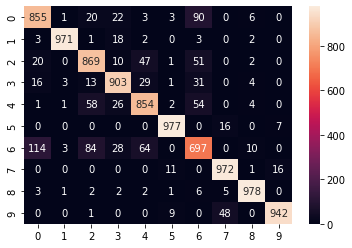

In [7]:
y_pred = model.predict(X_test_norm)
for currentVector in y_pred:
    index = np.argmax(currentVector)
    currentVector[:]=0
    currentVector[index] = 1
y_test_eval = oneHot.inverse_transform(y_test)
y_pred = oneHot.inverse_transform(y_pred)
cf = confusion_matrix(y_test_eval,y_pred)
ax = sns.heatmap(cf,annot=True,fmt="d")
print("Micro F1 score:",f1_score(y_test_eval,y_pred,average="micro"))
print("Macro F1 score:",f1_score(y_test_eval,y_pred,average="macro"))